### Урок 7. Классификация с помощью KNN. Кластеризация K-means

1) К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях k.

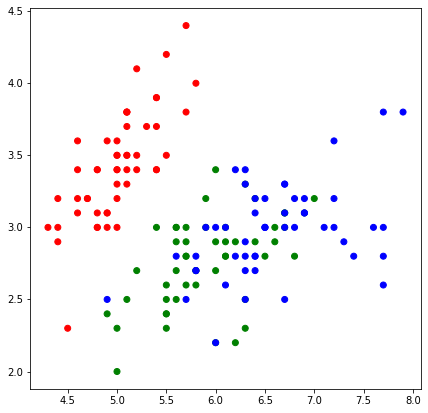

In [2]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

def knn(x_train, y_train, x_test, k, weight=False): 
    answers = []

    for x in x_test:
        test_distances = []
           
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
            
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        i = 1

        for d in sorted(test_distances)[0:k]:
            if not weight:
                # без учёта веса
                classes[d[1]] += 1 
            else:
                # q**i
                classes[d[1]] += 1/i  

                # q**d
                # q = 0.75
                # classes[d[1]] += q**d[0]  

                # 1/i
                # q = 0.5  
                # classes[d[1]] += q**i

                # (k+1 - i)/k
                # a = 3
                # classes[d[1]] += (k + 1 - i)/k  

                # 1/(i+a)**b
                # a = 3
                # b = 2
                # classes[d[1]] += 1/(i+a)**b  
                
            i += 1
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

def accuracy(pred, y):
    return (sum(pred == y) / len(y))

def get_graph(X_train, y_train, k, weight):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, weight)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()


X, y = load_iris(return_X_y=True)

X = X[:, :2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

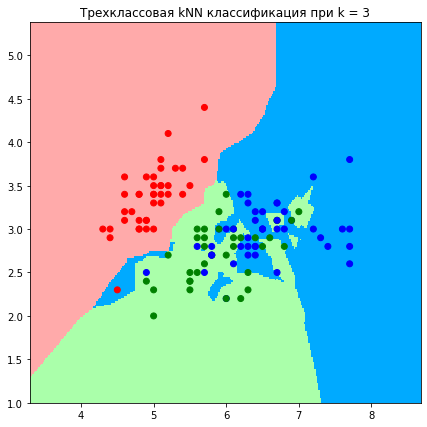

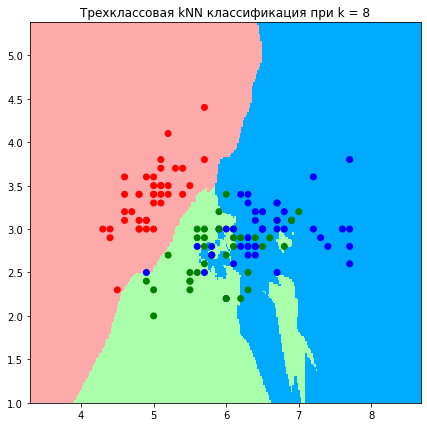

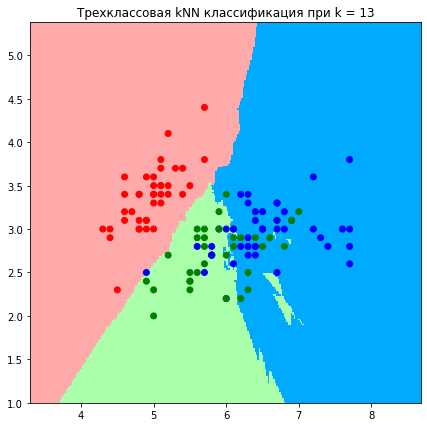

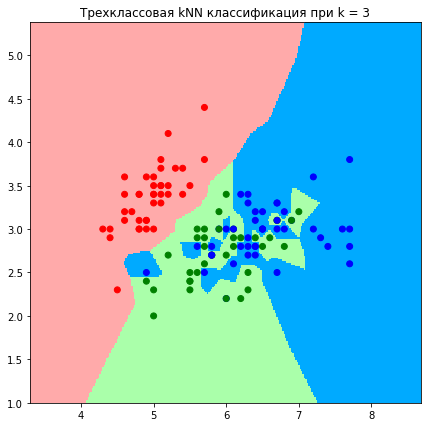

In [ ]:
results = []

# без веса
for k in range(3, 15, 5):
    y_pred = knn(X_train, y_train, X_test, k, weight=False)
    results.append(f'Точность при k = {k}: {accuracy(y_pred, y_test)}')
    get_graph(X_train, y_train, k, weight=False)
    
# с весом
for k in range(3, 15, 5):
    y_pred = knn(X_train, y_train, X_test, k, weight=True)
    results.append(f'Точность при k = {k} с учётом веса: {accuracy(y_pred, y_test)}')
    get_graph(X_train, y_train, k, weight=True)
    
for i in results:
    print(i)